# Digit Recognizer using KNN

In [1]:
#Modules

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading dataset

mnist = load_digits()

In [3]:
#features

X = pd.DataFrame(mnist.data,columns=mnist.feature_names)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
#class labels

Y = pd.DataFrame(mnist.target,columns=['Class'])
Y

,Class
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


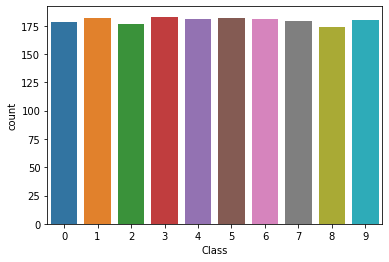

In [5]:
sns.countplot(data=X.join(Y),x='Class',orient='v',)
plt.show()

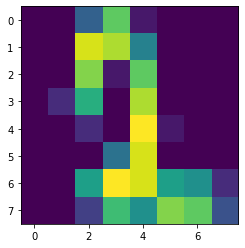

In [6]:
label = X.iloc[12,0:].values.reshape(8,8)
plt.imshow(label)
plt.show()

In [7]:
#standardization of data

X.fillna(0);Y.fillna(0)

scale = StandardScaler()
Xs = scale.fit_transform(X)
Xs = pd.DataFrame(Xs,columns=mnist.feature_names)
Xs

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [8]:
# train(70%) ,test(20%) ,validation(10%) splitting

xtrain ,x_test , ytrain ,y_test = train_test_split(Xs,Y,test_size=0.2,random_state=42)

x_train , x_val , y_train , y_val = train_test_split(xtrain,ytrain,test_size=0.1,random_state=42)

print("(x_train,y_train)",(x_train.shape,y_train.shape))
print("(x_test,y_test)",(x_test.shape,y_test.shape))
print("(x_val,y_val)",(x_val.shape,y_val.shape))




(x_train,y_train) ((1293, 64), (1293, 1))
(x_test,y_test) ((360, 64), (360, 1))
(x_val,y_val) ((144, 64), (144, 1))


# knn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [152]:
# k values
k = range(1,20)

In [153]:
"""
training and validation for finding best k value for 
our model
"""

accuracy_matrix = []
train_mat = []

for i in k:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy = knn.score(x_val,y_val)
    accuracy2 = knn.score(x_train,y_train)
    print("K = {} accuracy for validation is {:0.2f}% ".format(i,accuracy*100))
    accuracy_matrix.append(accuracy)
    train_mat.append(accuracy2)

K = 1 accuracy for validation is 97.22% 
K = 2 accuracy for validation is 95.83% 
K = 3 accuracy for validation is 96.53% 
K = 4 accuracy for validation is 95.83% 
K = 5 accuracy for validation is 97.22% 
K = 6 accuracy for validation is 96.53% 
K = 7 accuracy for validation is 96.53% 
K = 8 accuracy for validation is 96.53% 
K = 9 accuracy for validation is 96.53% 
K = 10 accuracy for validation is 96.53% 
K = 11 accuracy for validation is 96.53% 
K = 12 accuracy for validation is 95.83% 
K = 13 accuracy for validation is 95.83% 
K = 14 accuracy for validation is 96.53% 
K = 15 accuracy for validation is 95.83% 
K = 16 accuracy for validation is 95.14% 
K = 17 accuracy for validation is 95.14% 
K = 18 accuracy for validation is 95.14% 
K = 19 accuracy for validation is 95.14% 


In [154]:
"""
finding best k for our dataset
"""

pick_k = accuracy_matrix.index(max(accuracy_matrix))+1
pick_k

1

In [155]:
"""
Now we found our best k values using validation dataset
so we will test our model for that k values and will
find accuracy

"""

knn = KNeighborsClassifier(n_neighbors=pick_k)
knn.fit(x_train,y_train)
Y_pred = knn.predict(x_test)
acc = metrics.accuracy_score(y_test,Y_pred)
print("K ={} accuracy for testing is {:0.2f}% ".format(pick_k,accuracy*100))


K =1 accuracy for testing is 95.14% 


In [156]:
#confusion matrix
"""
confusion matrix gives us a clear view about the accuracy and precision that how many 
times our data true

"""

matrics = metrics.confusion_matrix(y_test,Y_pred)
matrics

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 37]])

In [157]:
#precision and recall

print(metrics.classification_report(y_test,Y_pred,target_names=['0','1','2','3','4','5','6','7','8','9']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.88      1.00      0.93        28
           2       0.97      0.97      0.97        33
           3       0.97      1.00      0.99        34
           4       1.00      0.96      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.97      0.93      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Accuracy 

In [158]:
#test accuracy

test_mat = []

for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        Y_pred = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,Y_pred)
        test_mat.append(accuracy)

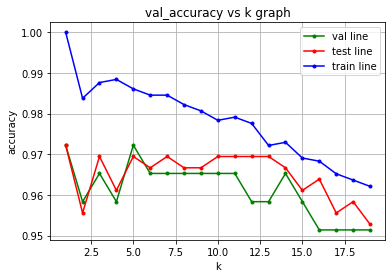

In [159]:
# k vs validation accuracy | k vs test accuracy | k vs train accuracy

plt.plot(k,accuracy_matrix,'g.-',label="val line")
plt.plot(k,test_mat,'r.-',label="test line")
plt.plot(k,train_mat,'b.-',label="train line")
plt.title('val_accuracy vs k graph')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Test a data

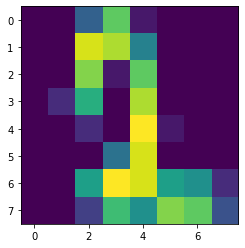

In [160]:
data=X.iloc[12,0:].values.reshape(8,8)
plt.imshow(data)
plt.show()

In [161]:
# our model answer
pred = knn.predict([X.iloc[12,0:]])
print(pred)

[2]


# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
#random forest for same dataset

model = RandomForestClassifier(n_estimators=200,max_samples=0.5)
model.fit(x_train,y_train)
Y_pred = model.predict(x_test)
accuracy_rf = model.score(x_test,y_test)
print("accuracy for testing in Random Forest is :  {:0.2f}% ".format(accuracy_rf*100))

accuracy for testing in Random Forest is :  96.94% 


In [17]:
#confusion matrix

matrics_rf = metrics.confusion_matrix(y_test,Y_pred)
matrics_rf

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  0, 37]])

In [19]:
#precision and recall

print(metrics.classification_report(y_test,Y_pred,target_names=['0','1','2','3','4','5','6','7','8','9']))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       1.00      0.93      0.97        30
           9       0.95      0.93      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [20]:
# training accuracy

model.score(x_train,y_train)*100

100.0

In [21]:
# test accuracy

model.score(x_test,y_test)*100

96.94444444444444

In [22]:
# val accuracy

model.score(x_val,y_val)*100

98.61111111111111

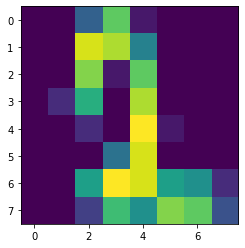

In [23]:
data=X.iloc[12,0:].values.reshape(8,8)
plt.imshow(data)
plt.show()

In [24]:
# our model answer

pred = model.predict([X.iloc[12,0:]])
print(pred)

[1]


# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
#decision tree for same dataset
depth = range(1,20)

for d in depth:
    d_model = DecisionTreeClassifier(max_depth=d)
    d_model.fit(x_train,y_train)
    #dY_pred = d_model.predict(x_test)
    d_acc = d_model.score(x_test,y_test)
    print("accuracy for testing for d= {} in decision Tree is :  {:0.2f}% ".format(d,d_acc*100))

accuracy for testing for d= 1 in decision Tree is :  16.39% 
accuracy for testing for d= 2 in decision Tree is :  28.89% 
accuracy for testing for d= 3 in decision Tree is :  46.11% 
accuracy for testing for d= 4 in decision Tree is :  59.17% 
accuracy for testing for d= 5 in decision Tree is :  67.78% 
accuracy for testing for d= 6 in decision Tree is :  79.44% 
accuracy for testing for d= 7 in decision Tree is :  84.44% 
accuracy for testing for d= 8 in decision Tree is :  84.44% 
accuracy for testing for d= 9 in decision Tree is :  87.50% 
accuracy for testing for d= 10 in decision Tree is :  87.50% 
accuracy for testing for d= 11 in decision Tree is :  86.67% 
accuracy for testing for d= 12 in decision Tree is :  87.50% 
accuracy for testing for d= 13 in decision Tree is :  86.94% 
accuracy for testing for d= 14 in decision Tree is :  86.94% 
accuracy for testing for d= 15 in decision Tree is :  87.22% 
accuracy for testing for d= 16 in decision Tree is :  86.11% 
accuracy for test

#### Now we will use d=10

In [51]:
dY_pred = d_model.predict(x_test)

In [52]:
#confusion matrix

d_matrics = metrics.confusion_matrix(y_test,dY_pred)
d_matrics

array([[29,  0,  0,  0,  1,  1,  0,  0,  1,  1],
       [ 0, 24,  1,  1,  0,  0,  0,  1,  0,  1],
       [ 0,  4, 24,  1,  1,  0,  1,  1,  1,  0],
       [ 0,  1,  0, 30,  1,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 44,  0,  0,  0,  0,  1],
       [ 0,  0,  4,  0,  2, 39,  1,  0,  0,  1],
       [ 0,  0,  0,  1,  1,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 31,  1,  1],
       [ 0,  4,  0,  2,  0,  0,  0,  0, 22,  2],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  2, 35]])

In [53]:
#precision and recall

print(metrics.classification_report(y_test,dY_pred,target_names=['0','1','2','3','4','5','6','7','8','9']))


              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.71      0.86      0.77        28
           2       0.83      0.73      0.77        33
           3       0.81      0.88      0.85        34
           4       0.85      0.96      0.90        46
           5       0.97      0.83      0.90        47
           6       0.94      0.94      0.94        35
           7       0.94      0.91      0.93        34
           8       0.76      0.73      0.75        30
           9       0.83      0.88      0.85        40

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



In [54]:
# training accuracy

d_model.score(x_train,y_train)*100

100.0

In [55]:
# test accuracy

d_model.score(x_test,y_test)*100

86.38888888888889

In [56]:
# val accuracy

d_model.score(x_val,y_val)*100

82.63888888888889

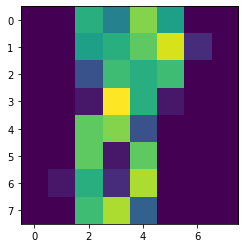

In [68]:
data=X.iloc[18,0:].values.reshape(8,8)
plt.imshow(data)
plt.show()

In [69]:
# our model answer

pred = d_model.predict([X.iloc[18,0:]])
print(pred)

[8]
